In [16]:
"""
This is a maze game that uses reinforcement learning to navigate a maze.
"""

"""
Library Dependencies : 

numpy - for creating and manipulating arrays and matrices
matplotlib - for displaying the maze
time - for timing the agent's progress
"""

import numpy as np
import matplotlib.pyplot as plt
import time

from maze import Maze, random_maze, prims_maze
from agents import GeneralQLearningAgent, QLearningAgent
from simulate import run_single_simulation, test_agent, train_agent



The code below sets up a simple maze with walls, a starting point (S), and a goal point (G). The maze is set up on a grid where each cell is either a 0 or 1, with 0 representing a black empty space and 1 representing a white wall. For your science project, you can use the sample maze we have provided, or change the code to make your own.

If you make your own maze follow these guidelines:
*   You can make it any size you want.
*   Make sure that the start and goal positions are located inside the maze and not on a wall.
*   Make sure your maze has a path from the start to the goal.


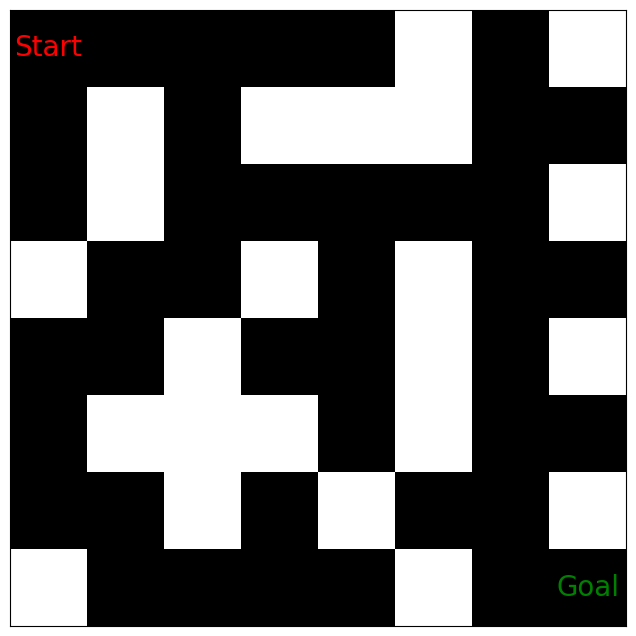

In [17]:
# Create any maze layout you'd like, here's an example
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0, 0), (4, 4))

# create a random maze
#maze = random_maze(8)
maze = prims_maze(8)
# Visualize the maze
maze.show_maze()

##**Defining the Reward System**

This code determines the values for the reward system. The reward system provides feedback to the agent in reinforcement learning.

Use these default settings to see how the agent performs when untrained, and when initially trained.  Then adjust the values and repeat the training and evalution steps outlines in the project idea.  Keep adjusting systematically until you have engineered the best possible reward system to have the AI learn to efficiently navigate a maze.

In [3]:
# This function simulates the agent's movements in the maze for a single episode.
default_reward_map = {
    "wall": -10,
    "step": -1,
    "goal": 0
}

## **Testing the Agent**

The code below tests how well the agent navigates the maze. It reports the total number of steps the agent took to get through the maze as well as the total reward the agent accumulated.

Every time you want to test the agent, run the function ten times.  Each time note the number of steps the agent used to travel between the start and the goal, as well as the total reward. Calculate the average steps and average reward across all ten test trials.

For your engineering project you will:
1. Test the agent before training.
2. Try solving the maze yourself by hand. What is the fewest number of steps you can take to solve the maze?
2. Test the agent after training with the default reward system values.
3. Make changes to the default reward system and test the agent.  You will repeat this until you have an agent who is learning very well.

Did you notice that the untrained agent takes *a lot* of steps? That is because the agent keeps backtracking and hitting walls. Before it has learned anything, it is blindly going through the maze, choosing its path randomly.

##**Setting Up the Reinforcement Learning Loop**

Below is the code for Q-learning, a basic reinforcement learning algorithm. This is used to train the agent. This code updates the Q-values based on the rewards it receives during exploration.  You do not need to change this code for your engineering project.

##**Training the Agent**

In [4]:
# Creating the next agent
agent = QLearningAgent(maze, maze.get_actions())

episode reward: -539, episode step: 100
Learned Path:
(0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (0, 0)-> (1, 0)-> (1, 1)-> (1, 2)-> (1, 3)-> (1, 2)-> (1, 3)-> (1, 4)-> (0, 4)-> (1, 4)-> (1, 3)-> (1, 4)-> (1, 3)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (1, 3)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (3, 3)-> (3, 4)-> (3, 3)-> (3, 4)-> (4, 4)-> Goal!
Number of steps: 100
Total reward: -539


<Figure size 640x480 with 0 Axes>

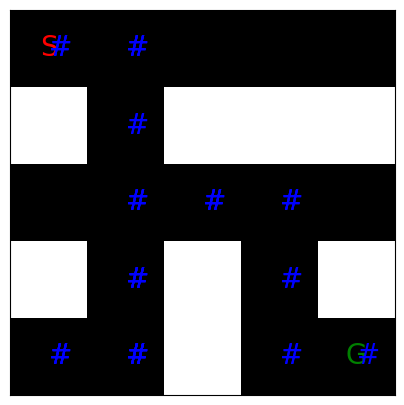

(100, -539)

In [5]:
# Test the agent using the test_agent function
test_agent(agent, maze)

epsiode : 0
episode reward: -677, episode step: 139
epsiode : 1
episode reward: -633, episode step: 140
epsiode : 2
episode reward: -305, episode step: 91
epsiode : 3
episode reward: -1483, episode step: 333
epsiode : 4
episode reward: -93, episode step: 41
epsiode : 5
episode reward: -911, episode step: 229
epsiode : 6
episode reward: -283, episode step: 78
epsiode : 7
episode reward: 1, episode step: 19
epsiode : 8
episode reward: -41, episode step: 43
epsiode : 9
episode reward: -57, episode step: 50
epsiode : 10
episode reward: -89, episode step: 55
epsiode : 11
episode reward: -13, episode step: 24
epsiode : 12
episode reward: 65, episode step: 18
epsiode : 13
episode reward: 17, episode step: 30
epsiode : 14
episode reward: 15, episode step: 23
epsiode : 15
episode reward: 41, episode step: 15
epsiode : 16
episode reward: 9, episode step: 29
epsiode : 17
episode reward: -73, episode step: 39
epsiode : 18
episode reward: 51, episode step: 14
epsiode : 19
episode reward: 39, episod

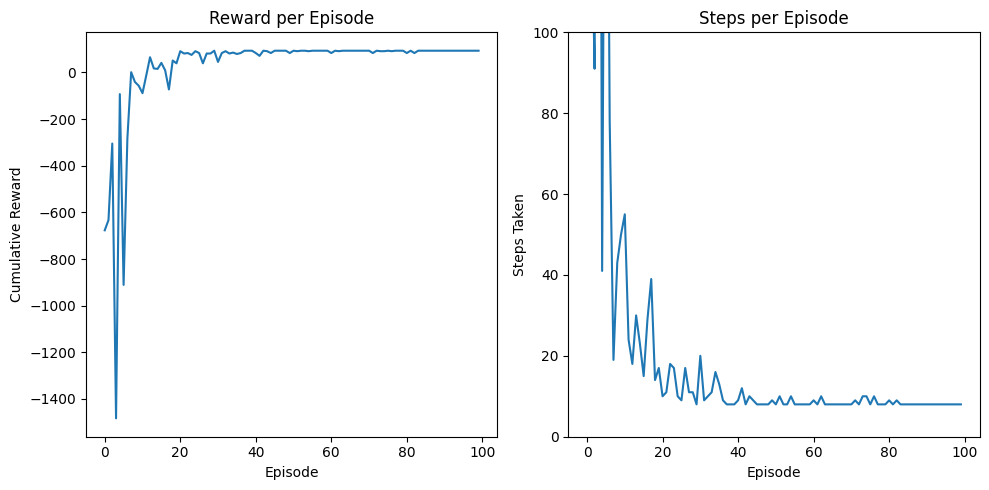

In [6]:

# Training the agent
training_episode_count = 100
train_agent(agent, maze, num_episodes=training_episode_count)


In [7]:
for i in range(4):
    for j in range(4):
        print(f"{i},{j} : {agent.q_table[i,j,:]}")


0,0 : [-10.8134     -11.34722299 -10.17446111  35.46936267]
0,1 : [0. 0. 0. 0.]
0,2 : [-10.94060318 -10.43435854 -10.23112361   8.43077519]
0,3 : [0. 0. 0. 0.]
1,0 : [ 44.07481379 -10.4577724   -1.34212326  -2.7803616 ]
1,1 : [ 52.60283369   2.73322499 -10.78175172  -7.89080665]
1,2 : [-1.3714445  -1.40133849 -1.78593354 61.10536231]
1,3 : [-1.77300147  7.87735978 -9.60039906 -9.22694568]
2,0 : [-10.92454679 -10.30897635  -2.74101644  -2.72003027]
2,1 : [0. 0. 0. 0.]
2,2 : [-0.53368168 -5.46578573 -0.35309086 69.79013483]
2,3 : [0. 0. 0. 0.]
3,0 : [ -7.45222503 -10.1424696   -2.67827451  -2.78848851]
3,1 : [0. 0. 0. 0.]
3,2 : [78.98238594 11.86117191  4.11709337  4.28461922]
3,3 : [88.97571497 26.8116752  25.6885345  26.37395411]


episode reward: 93, episode step: 8
Learned Path:
(0, 0)-> (1, 0)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (3, 3)-> (3, 4)-> (4, 4)-> Goal!
Number of steps: 8
Total reward: 93


<Figure size 640x480 with 0 Axes>

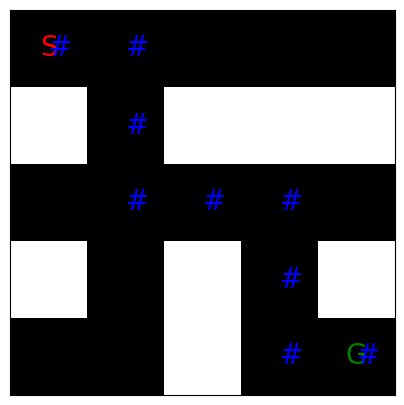

(8, 93)

In [8]:
# Testing the agent after training
test_agent(agent, maze, num_episodes=100, debug=False)

episode reward: -1995, episode step: 359
Learned Path:
(0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (1, 1)-> (1, 2)-> (1, 3)-> (1, 4)-> (0, 4)-> (1, 4)-> (1, 3)-> (1, 4)-> (0, 4)-> (1, 4)-> (1, 3)-> (1, 2)-> (2, 2)-> 

<Figure size 640x480 with 0 Axes>

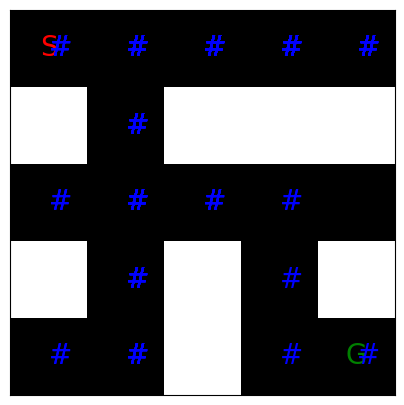

(359, -1995)

In [9]:
new_agent = GeneralQLearningAgent(maze.get_actions)
test_agent(new_agent, maze)



epsiode : 0
episode reward: -931, episode step: 177
epsiode : 1
episode reward: -941, episode step: 178
epsiode : 2
episode reward: -927, episode step: 200
epsiode : 3
episode reward: -475, episode step: 135
epsiode : 4
episode reward: -231, episode step: 71
epsiode : 5
episode reward: -453, episode step: 122
epsiode : 6
episode reward: -355, episode step: 96
epsiode : 7
episode reward: -91, episode step: 48
epsiode : 8
episode reward: -47, episode step: 31
epsiode : 9
episode reward: -37, episode step: 39
epsiode : 10
episode reward: -45, episode step: 38
epsiode : 11
episode reward: -31, episode step: 42
epsiode : 12
episode reward: 57, episode step: 17
epsiode : 13
episode reward: -9, episode step: 38
epsiode : 14
episode reward: 63, episode step: 11
epsiode : 15
episode reward: 29, episode step: 18
epsiode : 16
episode reward: 39, episode step: 17
epsiode : 17
episode reward: -7, episode step: 36
epsiode : 18
episode reward: 67, episode step: 16
epsiode : 19
episode reward: 71, epi

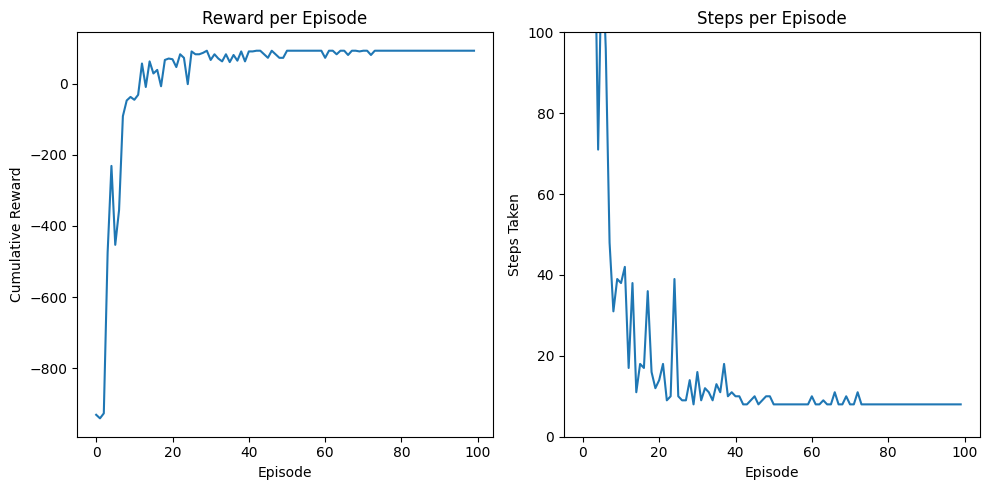

episode reward: 93, episode step: 8
Learned Path:
(0, 0)-> (1, 0)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (3, 3)-> (3, 4)-> (4, 4)-> Goal!
Number of steps: 8
Total reward: 93


<Figure size 640x480 with 0 Axes>

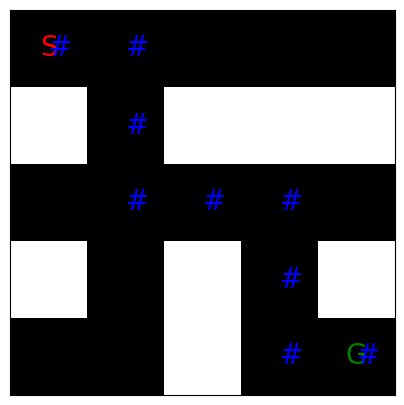

(8, 93)

In [10]:
train_agent(new_agent, maze, num_episodes=training_episode_count)
test_agent(new_agent, maze, num_episodes=training_episode_count)

In [11]:
new_agent.q_table

{(('position', (0, 0)),): {np.str_('left'): -11.369388082771687,
  np.str_('right'): 34.084893384143335,
  np.str_('up'): -9.667781955957944,
  np.str_('down'): -10.176833368238864},
 (('position', (1, 0)),): {np.str_('down'): 43.13475401732354,
  np.str_('right'): -2.8556701184840083,
  np.str_('up'): -8.51237582977132,
  np.str_('left'): -3.2688963218295535},
 (('position', (1, 1)),): {np.str_('up'): -2.617176077020731,
  np.str_('down'): 52.04829364321247,
  np.str_('right'): -9.899162657063986,
  np.str_('left'): -8.530429389307773},
 (('position', (2, 0)),): {np.str_('left'): 0.3214733004667647,
  np.str_('up'): -11.020425147250876,
  np.str_('right'): -2.8024695511598137,
  np.str_('down'): -10.07362035114124},
 (('position', (3, 0)),): {np.str_('left'): -2.8260207542926947,
  np.str_('up'): -10.132914094055629,
  np.str_('down'): -10.611140154882182,
  np.str_('right'): -2.7612368978884714},
 (('position', (4, 0)),): {np.str_('left'): -2.76819059241005,
  np.str_('down'): -10.10

In [12]:
from maze import KeyMaze

GOT THE KEY!
Goal with key!
episode reward: -7699.0, episode step: 1476
Learned Path:
(0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 2)-> (0, 2)-> (1, 2)-> (1, 1)-> (1, 2)-> (0, 2)-> (1, 2)-> (1, 3)-> (1, 4)-> (1, 3)-> (1, 2)-> (1, 1)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (4, 2)-> (3, 2)-> (3, 3)-> (3, 2)-> (3, 3)-> (3, 2)-> (3, 3)-> (3, 4)-> (4, 4)-> (4, 4)-> (4, 4)-> (4, 4)-> (4, 4)-> (3, 4)-> (3, 3)-> (3, 4)-> (3, 3)-> (3, 2)-> (4, 2)-> (3, 2)-> (4, 2)-> (3, 2)-> (3, 3)-> (3, 2)-> (3, 3)-> (3, 4)-> (4, 4)-> (4, 4)-> (4, 4)-> (3, 4)-> (4, 4)-> (4, 4)-> (4, 4)-> (4, 4

<Figure size 640x480 with 0 Axes>

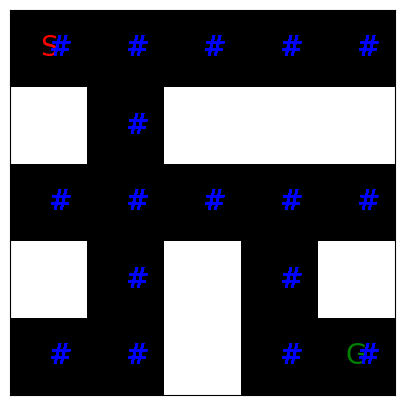

epsiode : 0
Goal with key!
episode reward: -3136.0, episode step: 660
epsiode : 1
Goal with key!
episode reward: -1588.0, episode step: 350
epsiode : 2
Goal with key!
episode reward: -1449, episode step: 263
epsiode : 3
Goal with key!
episode reward: -139, episode step: 60
epsiode : 4
Goal with key!
episode reward: -1275.0, episode step: 429
epsiode : 5
Goal with key!
episode reward: -487, episode step: 129
epsiode : 6
Goal with key!
episode reward: -559.0, episode step: 241
epsiode : 7
Goal with key!
episode reward: -887.0, episode step: 243
epsiode : 8
Goal with key!
episode reward: -107.0, episode step: 80
epsiode : 9
Goal with key!
episode reward: -420.0, episode step: 199
epsiode : 10
Goal with key!
episode reward: -447, episode step: 170
epsiode : 11
Goal with key!
episode reward: -482.0, episode step: 219
epsiode : 12
Goal with key!
episode reward: -113, episode step: 70
epsiode : 13
Goal with key!
episode reward: -885.0, episode step: 591
epsiode : 14
Goal with key!
episode rew

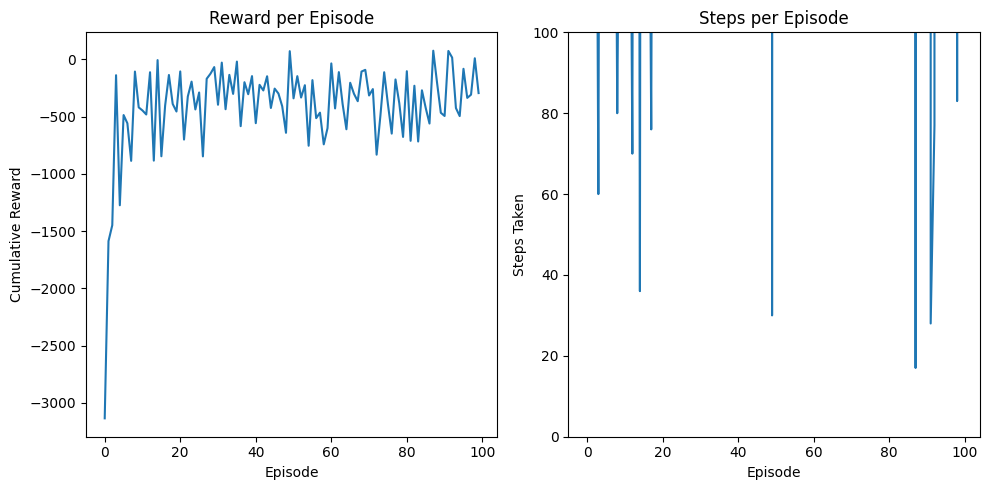

Goal with key!
episode reward: -967, episode step: 177
Learned Path:
(0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (1, 1)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 2)-> (1, 1)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (1, 1)-> (1, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (3, 3)-> (3, 2)-> (4, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (2, 2)-> (3, 2)-> (3, 3)-> (3, 4)-> (4, 4)-> Goal!
Number of steps: 177
Total reward: -967


<Figure size 640x480 with 0 Axes>

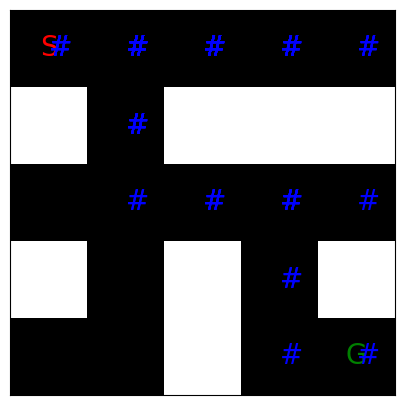

(177, -967)

In [13]:
key_maze = KeyMaze(maze.maze, [0,0], [4,4], [0,4])

key_agent = GeneralQLearningAgent(key_maze.get_actions)
test_agent(key_agent, key_maze)
train_agent(key_agent, key_maze, num_episodes=training_episode_count)

test_agent(key_agent, key_maze)

In [14]:
key_agent.q_table

{(('position', (0, 0)),): {},
 (('has_key', True),
  ('position',
   (0,
    0))): {np.str_('down'): -9.997302783944093, np.str_('up'): -9.996670103634683, np.str_('right'): -0.9999999999999996, np.str_('left'): -9.996300115149648},
 (('position', (1, 0)),): {},
 (('has_key', True),
  ('position',
   (1,
    0))): {np.str_('left'): -0.9999999999999996, np.str_('down'): -0.9999999999999996, np.str_('right'): -0.9999999999999996, np.str_('up'): -9.999897095698543},
 (('position', (1, 1)),): {},
 (('has_key', True),
  ('position',
   (1,
    1))): {np.str_('up'): -0.9999999999999996, np.str_('right'): -9.998407320891149, np.str_('down'): -0.9999999999999996, np.str_('left'): -9.994924712139436},
 (('position', (2, 0)),): {},
 (('has_key', True),
  ('position',
   (2,
    0))): {np.str_('down'): -9.997815254994716, np.str_('left'): -0.9999999999999996, np.str_('up'): -9.999704873345692, np.str_('right'): -0.9999999999999996},
 (('position', (3, 0)),): {},
 (('has_key', True),
  ('position'

## **Evaluating the Agent**

1. Test the agent again using the test_agent function. Run the code 10 times and note how many steps the agent takes to reach the goal. On average, how many steps does the agent take?
2. Does the agent consistently find the shortest path from the starting position to the goal?

## **Experimenting and Improving**

Try experimenting with a different reward system to see how that affects how the agent learns. Copy or run this cell multiple times, changing the goal reward from 0 to 1, 10, 20, 30, etc.. and to 100, and 1000.

In [15]:
goal_reward = 10
wall_penalty = -1
step_penalty = -0.1

agent = QLearningAgent(maze, actions)

train_agent(agent, maze, num_episodes=300)

NameError: name 'actions' is not defined

## **Variation: Creating More Mazes**

Create new mazes and test how well the agent performs in more complex mazes with multiple paths and dead ends

In [89]:
# Create any maze layout you'd like
maze_layout = np.array([[]])

# Create an instance of the maze and set the starting and ending positions
start_x = #
start_y = #
goal_x = #
goal_y = #
maze = Maze(maze_layout, (start_x, start_y), (goal_x, goal_y))
# Visualize the maze
maze.show_maze()

SyntaxError: invalid syntax (1408327039.py, line 5)

In [ ]:
# Create the agent object
agent = QLearningAgent(maze, actions)
# Test the agent using the test_agent function
test_agent(agent, maze)

In [ ]:
# Training the agent
train_agent(agent, maze, num_episodes=100)

In [ ]:
# Testing agent again after training, feel free to run multiple times
test_agent(agent, maze)